In [1]:
from download import *
from databuilder import *
from dataset import *
from processing import *

from torchvision import transforms
import torch.nn as nn

from ResNet import resnet
from MobileNet import MobileNetV2
from EfficientNet import efficientnet

import funcs

df = download_mimii("../../../data/mimii", "0_dB")

../../../data/mimii/0_dB/fan.zip already exist.
../../../data/mimii/0_dB/fan.zip already extracted.
../../../data/mimii/0_dB/pump.zip already exist.
../../../data/mimii/0_dB/pump.zip already extracted.
../../../data/mimii/0_dB/slider.zip already exist.
../../../data/mimii/0_dB/slider.zip already extracted.
../../../data/mimii/0_dB/valve.zip already exist.
../../../data/mimii/0_dB/valve.zip already extracted.


In [2]:
df

data  samplerate  \
0      [0.0020599365, 0.004432678, 0.0065078735, 0.00...       16000   
1      [-0.00050354004, -0.00019454956, 0.0007286072,...       16000   
2      [-0.015193939, -0.014381409, -0.013492584, -0....       16000   
3      [0.012817383, 0.013893127, 0.015125275, 0.0149...       16000   
4      [-0.010471344, -0.012817383, -0.015136719, -0....       16000   
...                                                  ...         ...   
18014  [0.00061798096, 0.0021476746, 0.002922058, 0.0...       16000   
18015  [0.0021514893, 0.0017585754, 0.0011749268, 0.0...       16000   
18016  [0.0040626526, 0.004486084, 0.0033035278, 0.00...       16000   
18017  [-0.0013008118, -0.0023880005, -0.0028762817, ...       16000   
18018  [-0.00031280518, 0.00023651123, 0.00049209595,...       16000   

                                                    path machinetype modelID  \
0      ../../../data/mimii/0_dB/fan/id_00/abnormal/00...         fan   id_00   
1      ../../../data/mimii/0_dB/fan/id_00/abnormal/00...         fan   id_00   
2      ../../../data/mimii/0_dB/fan/id_00/abnormal/00...         fan   id_00   
3      ../../../data/mimii/0_dB/fan/id_00/abnormal/00...         fan   id_00   
4      ../../../data/mimii/0_dB/fan/id_00/abnormal/00...         fan   id_00   
...                                                  ...         ...     ...   
18014  ../../../data/mimii/0_dB/valve/id_06/normal/00...       valve   id_06   
18015  ../../../data/mimii/0_dB/valve/id_06/normal/00...       valve   id_06   
18016  ../../../data/mimii/0_dB/valve/id_06/normal/00...       valve   id_06   
18017  ../../../data/mimii/0_dB/valve/id_06/normal/00...       valve   id_06   
18018  ../../../data/mimii/0_dB/valve/id_06/normal/00...       valve   id_06   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
18014      0  
18015      0  
18016      0  
18017      0  
18018      0  

[18019 rows x 6 columns]

In [3]:
data_df = {
    "machinetype":[],
    "modelID": [],
    "label":[],
    "RMS": [],
    "Peak": [],
    "Peak-to-Peak": [],
    "Crest factor": [],
    "skewness": []
}

In [4]:
for machinetype in df["machinetype"]:
    data_df["machinetype"].append(machinetype)

for modelID in df["modelID"]:
    data_df["modelID"].append(modelID)

for label in df["label"]:
    data_df["label"].append(label)

In [5]:
for data in df["data"]:
    rms = librosa.feature.rms(y=data)
    data_df["RMS"].append(rms)

In [8]:
data_df["RMS"]

[array([[0.00687188, 0.00830934, 0.00937896, 0.00904005, 0.00886963,
         0.00883898, 0.00940139, 0.01071999, 0.01142034, 0.01167982,
         0.01171495, 0.01112235, 0.01049899, 0.0103631 , 0.01007772,
         0.00969008, 0.00983349, 0.00983549, 0.01005665, 0.01032298,
         0.0104354 , 0.0104199 , 0.01074062, 0.01129949, 0.01185944,
         0.01179395, 0.01099819, 0.01003519, 0.00929308, 0.00974589,
         0.0100787 , 0.01015927, 0.01004817, 0.00936337, 0.00946702,
         0.00943764, 0.00922681, 0.00900301, 0.00825439, 0.00834027,
         0.00817947, 0.00898308, 0.00983721, 0.00972335, 0.00947192,
         0.00926894, 0.00960534, 0.01031976, 0.01116132, 0.01131853,
         0.01095335, 0.01056991, 0.00995419, 0.00973346, 0.00951197,
         0.01024213, 0.01139081, 0.01212077, 0.01276423, 0.01288854,
         0.0126109 , 0.01198893, 0.01162053, 0.01063491, 0.0095906 ,
         0.00942901, 0.00882512, 0.00902456, 0.0095063 , 0.0097237 ,
         0.00966511, 0.01001505, 0

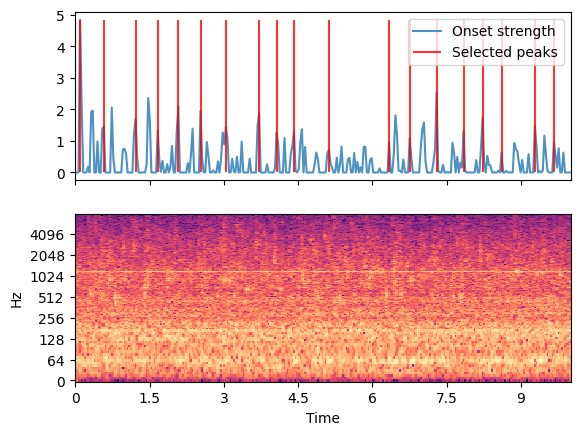

In [9]:
import numpy as np
import matplotlib.pyplot as plt

normal_data, sample_rate = librosa.load('../../../data/mimii/0_dB/pump/id_00/normal/00000000.wav', sr=16000)
onset_env = librosa.onset.onset_strength(y=normal_data, sr=sample_rate,hop_length=512, aggregate=np.median)
peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=10)

times = librosa.times_like(onset_env, sr=sample_rate, hop_length=512)
fig, ax = plt.subplots(nrows=2, sharex=True)
D = np.abs(librosa.stft(normal_data))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', ax=ax[1], sr=sample_rate)

ax[0].plot(times, onset_env, alpha=0.8, label='Onset strength')
ax[0].vlines(times[peaks], 0, onset_env.max(), color='r', alpha=0.8, label='Selected peaks')
ax[0].legend(frameon=True, framealpha=0.8)
ax[0].label_outer()

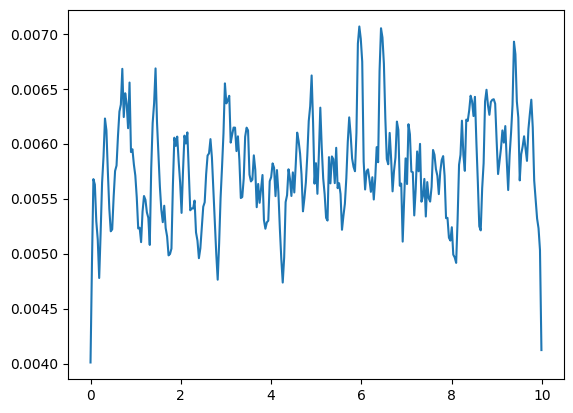

In [24]:
rms = librosa.feature.rms(y=normal_data)

times = librosa.times_like(rms, sr=16000)
plt.plot(times, rms[0])